In [1]:
import pandas as pd

df = pd.read_csv('/Users/aahanmalik/Desktop/NUS/credit card .csv')
print(df)

       Customer_Number    Customer_Status  Age Gender  Number_of_Dependents  \
0            768805383  Existing Customer   45      M                     3   
1            818770008  Existing Customer   49      F                     5   
2            713982108  Existing Customer   51      M                     3   
3            769911858  Existing Customer   40      F                     4   
4            709106358  Existing Customer   40      M                     3   
...                ...                ...  ...    ...                   ...   
10122        772366833  Existing Customer   50      M                     2   
10123        710638233  Attrited Customer   41      M                     2   
10124        716506083  Attrited Customer   44      F                     1   
10125        717406983  Attrited Customer   30      M                     2   
10126        714337233  Attrited Customer   43      F                     2   

      Education_Level Marital_Status Income_Categor

In [2]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
df_sub = df.sample(n=1000, random_state=35053)
print(df_sub)

      Customer_Number    Customer_Status  Age Gender  Number_of_Dependents  \
7399        742572558  Existing Customer   32      F                     0   
9882        770743983  Existing Customer   34      F                     3   
5118        771222558  Existing Customer   45      F                     3   
4407        793269933  Existing Customer   46      M                     3   
3244        720781158  Existing Customer   44      F                     2   
...               ...                ...  ...    ...                   ...   
5883        769577358  Existing Customer   31      F                     0   
368         819129858  Existing Customer   46      F                     2   
5988        718267233  Existing Customer   50      M                     1   
8673        774491958  Existing Customer   53      M                     3   
407         709311633  Existing Customer   41      M                     2   

     Education_Level Marital_Status  Income_Category Card_Categ

In [4]:
df_sub.head()

,Customer_Number,Customer_Status,Age,Gender,Number_of_Dependents,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
7399,742572558,Existing Customer,32,F,0,High School,Divorced,Unknown,Blue,25,12268.0,1165,4905,82
9882,770743983,Existing Customer,34,F,3,Uneducated,Single,$40K - $60K,Blue,20,8698.0,874,15683,94
5118,771222558,Existing Customer,45,F,3,Graduate,Unknown,Less than $40K,Blue,32,2900.0,2018,4467,79
4407,793269933,Existing Customer,46,M,3,Graduate,Unknown,$60K - $80K,Silver,40,28829.0,0,4540,78
3244,720781158,Existing Customer,44,F,2,Uneducated,Divorced,$40K - $60K,Blue,27,5608.0,1243,3829,74


In [5]:
print(df_sub.isnull().sum())

# Descriptive statistics
print(df_sub.describe())

Customer_Number              0
Customer_Status              0
Age                          0
Gender                       0
Number_of_Dependents         0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_Use                0
Credit_Limit                 0
Yearly_Average_Balance       0
Yearly_Transaction_Amount    0
Total_Transactions           0
dtype: int64
       Customer_Number          Age  Number_of_Dependents  Months_on_Use  \
count     1.000000e+03  1000.000000           1000.000000    1000.000000   
mean      7.381971e+08    46.094000              2.319000      35.820000   
std       3.625733e+07     8.134946              1.292637       7.945989   
min       7.081343e+08    26.000000              0.000000      13.000000   
25%       7.131694e+08    41.000000              1.000000      31.000000   
50%       7.178568e+08    46.000000              2.000000      36.000000   
75%       7.718042e+0

In [6]:
type_col = df_sub["Customer_Status"].tolist()

for i in range(len(type_col)):
    if(type_col[i]=='Existing Customer'):
        type_col[i]=0
    elif(type_col[i]=='Attrited Customer'):
        type_col[i]=1
        
df_sub["Attrition_flag"]= type_col

print(df_sub)

      Customer_Number    Customer_Status  Age Gender  Number_of_Dependents  \
7399        742572558  Existing Customer   32      F                     0   
9882        770743983  Existing Customer   34      F                     3   
5118        771222558  Existing Customer   45      F                     3   
4407        793269933  Existing Customer   46      M                     3   
3244        720781158  Existing Customer   44      F                     2   
...               ...                ...  ...    ...                   ...   
5883        769577358  Existing Customer   31      F                     0   
368         819129858  Existing Customer   46      F                     2   
5988        718267233  Existing Customer   50      M                     1   
8673        774491958  Existing Customer   53      M                     3   
407         709311633  Existing Customer   41      M                     2   

     Education_Level Marital_Status  Income_Category Card_Categ

       Card_Category Gender Education_Level Marital_Status Income_Category
count           1000   1000            1000           1000            1000
unique             4      2               7              4               6
top             Blue      F        Graduate        Married  Less than $40K
freq             932    524             330            440             348


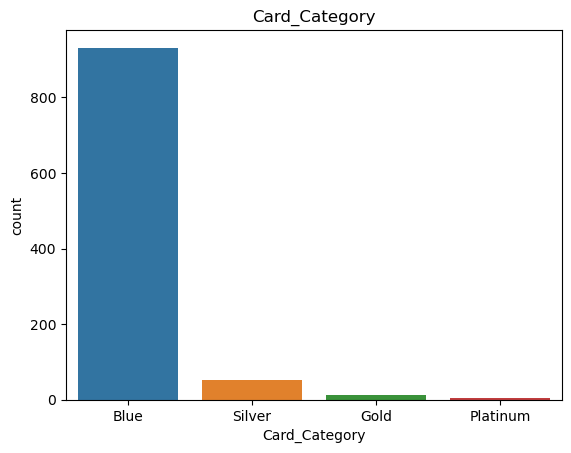

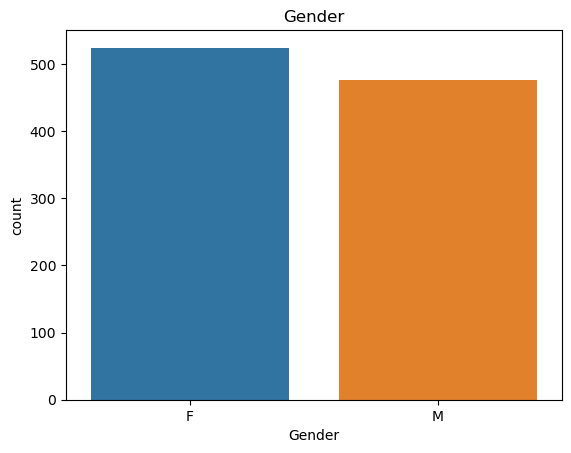

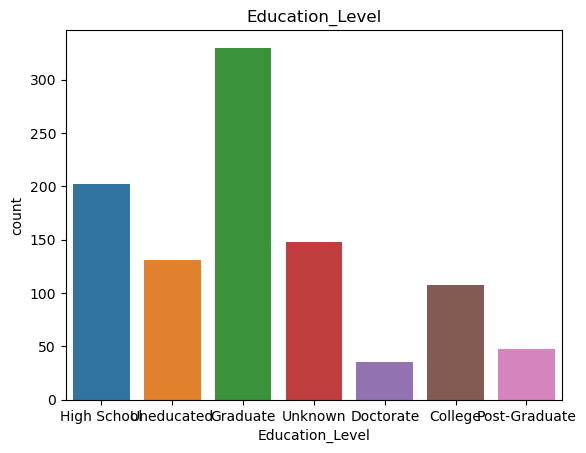

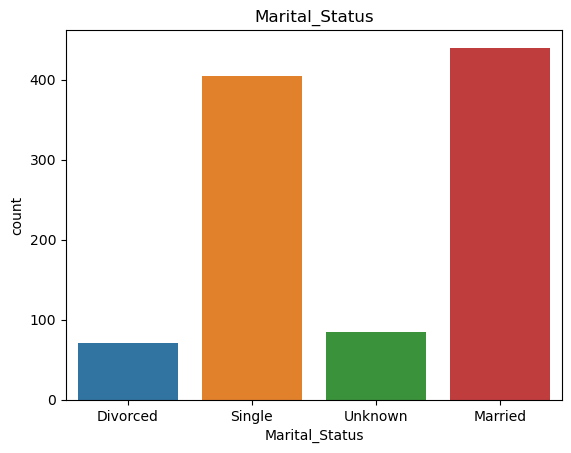

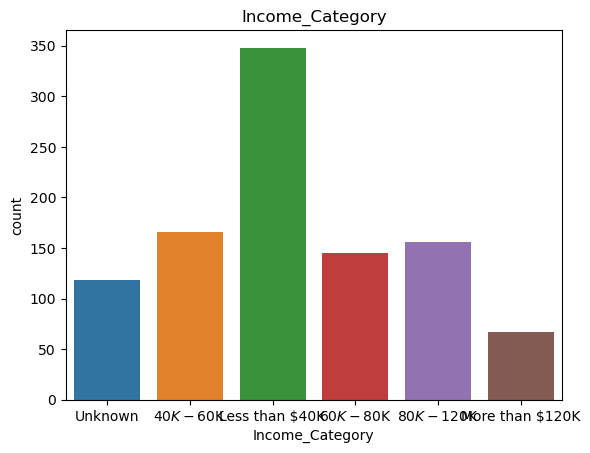

In [7]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# Identify categorical and non-categorical variables
df_cat_vars = ['Card_Category', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category']
df_noncat_vars = ['Customer_Number', 'Age', 'Number_of_Dependents', 'Months_on_Use', 
                  'Credit_Limit', 'Yearly_Average_Balance','Yearly_Transaction_Amount','Total_Transactions']

# Descriptive statistics of categorical variables
print(df_sub[df_cat_vars].describe())

# Count plots of categorical variables
for Card_Category in df_cat_vars:
    plt.figure()
    sns.countplot(data=df_sub, x=Card_Category)
    plt.title(Card_Category)
    plt.show()


In [8]:
# Descriptive statistics of numeric variables
print(df_sub[df_noncat_vars].describe())

       Customer_Number          Age  Number_of_Dependents  Months_on_Use  \
count     1.000000e+03  1000.000000           1000.000000    1000.000000   
mean      7.381971e+08    46.094000              2.319000      35.820000   
std       3.625733e+07     8.134946              1.292637       7.945989   
min       7.081343e+08    26.000000              0.000000      13.000000   
25%       7.131694e+08    41.000000              1.000000      31.000000   
50%       7.178568e+08    46.000000              2.000000      36.000000   
75%       7.718042e+08    52.000000              3.000000      40.000000   
max       8.282274e+08    65.000000              5.000000      56.000000   

       Credit_Limit  Yearly_Average_Balance  Yearly_Transaction_Amount  \
count   1000.000000             1000.000000                1000.000000   
mean    8860.209100             1141.649000                4307.101000   
std     9278.715112              803.545281                3267.068164   
min     1438.300000

In [9]:
# Mean and median of credit limit
print("Mean Credit Limit:", np.mean(df_sub['Credit_Limit']))
print("Median Credit Limit:", np.median(df_sub['Credit_Limit']))

# Standard deviation of balance by card type
print(df_sub.groupby('Card_Category')['Yearly_Average_Balance'].std())

Mean Credit Limit: 8860.209099999998
Median Credit Limit: 4695.0
Card_Category
Blue        801.535808
Gold        924.273041
Platinum    607.241028
Silver      821.862481
Name: Yearly_Average_Balance, dtype: float64


In [10]:
# Count of customers by card type
print(df_sub['Card_Category'].value_counts())

Blue        932
Silver       53
Gold         11
Platinum      4
Name: Card_Category, dtype: int64


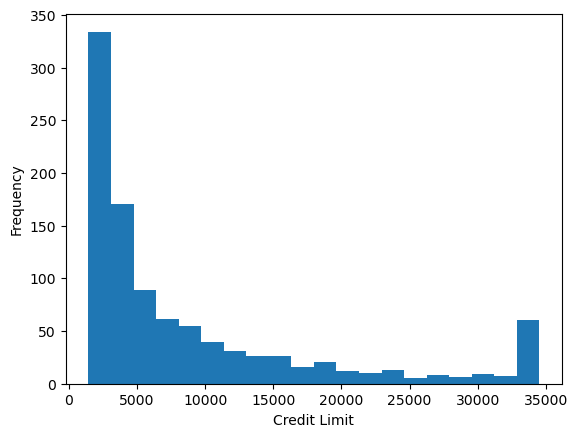

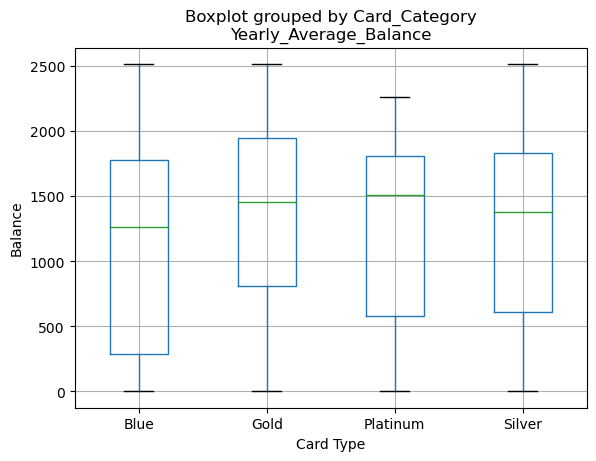

In [11]:
import matplotlib.pyplot as plt

# Histogram of credit limit
plt.hist(df_sub['Credit_Limit'], bins=20)
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

# Box plot of balance by card type
df.boxplot(column='Yearly_Average_Balance', by='Card_Category')
plt.xlabel('Card Type')
plt.ylabel('Balance')
plt.show()

In [12]:
# Two-sample t-test
group1 = df_sub[df_sub['Card_Category']=='Blue']['Yearly_Average_Balance']
group2 = df_sub[df_sub['Card_Category']=='Gold']['Yearly_Average_Balance']
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -1.4161254368573941
p-value: 0.18660591659935677


       Customer_Number          Age  Number_of_Dependents  Months_on_Use  \
count     1.000000e+03  1000.000000           1000.000000    1000.000000   
mean      7.381971e+08    46.094000              2.319000      35.820000   
std       3.625733e+07     8.134946              1.292637       7.945989   
min       7.081343e+08    26.000000              0.000000      13.000000   
25%       7.131694e+08    41.000000              1.000000      31.000000   
50%       7.178568e+08    46.000000              2.000000      36.000000   
75%       7.718042e+08    52.000000              3.000000      40.000000   
max       8.282274e+08    65.000000              5.000000      56.000000   

       Credit_Limit  Yearly_Average_Balance  Yearly_Transaction_Amount  \
count   1000.000000             1000.000000                1000.000000   
mean    8860.209100             1141.649000                4307.101000   
std     9278.715112              803.545281                3267.068164   
min     1438.300000

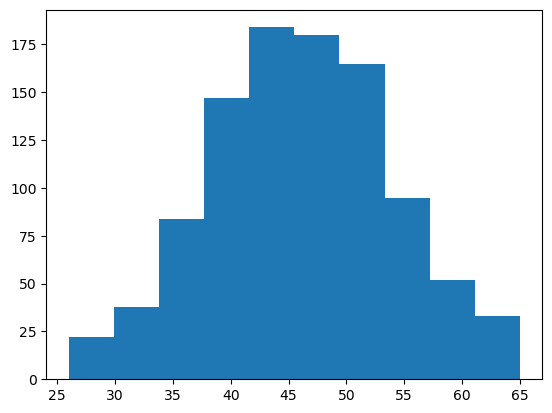

In [13]:
# explore dataset
print(df_sub.describe())
plt.hist(df_sub['Age'])
plt.show()

In [14]:
print(df_sub.corr())

                           Customer_Number       Age  Number_of_Dependents  \
Customer_Number                   1.000000  0.019524              0.036441   
Age                               0.019524  1.000000             -0.091574   
Number_of_Dependents              0.036441 -0.091574              1.000000   
Months_on_Use                     0.142494  0.774069             -0.096441   
Credit_Limit                      0.004045  0.008141              0.072801   
Yearly_Average_Balance            0.038443  0.002521              0.016744   
Yearly_Transaction_Amount        -0.041399 -0.044134             -0.048127   
Total_Transactions               -0.038156 -0.049809             -0.012655   
Attrition_flag                   -0.015192  0.043557              0.062324   

                           Months_on_Use  Credit_Limit  \
Customer_Number                 0.142494      0.004045   
Age                             0.774069      0.008141   
Number_of_Dependents           -0.096441     

In [15]:
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

group1 = df_sub[df_sub['Gender']=='M']['Yearly_Average_Balance']
group2 = df_sub[df_sub['Gender']=='F']['Yearly_Average_Balance']
t_stat, p_val = ttest_ind(group1, group2)
print("t-statistic = ", t_stat)
print("p-value = ", p_val)

t-statistic =  -0.8833120607364877
p-value =  0.37728041298147297


In [16]:
# ANOVA to compare mean balance across different income levels
model = sm.formula.ols('Yearly_Average_Balance ~ Income_Category', data=df_sub).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

print(aov_table)

                       sum_sq     df         F   PR(>F)
Income_Category  3.029083e+06    5.0  0.937963  0.45541
Residual         6.420103e+08  994.0       NaN      NaN


In [17]:
# Simple linear regression to predict balance based on credit limit
model = sm.formula.ols('Yearly_Average_Balance ~ Credit_Limit', data=df_sub).fit()
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Yearly_Average_Balance   R-squared:                       0.005
Model:                                OLS   Adj. R-squared:                  0.004
Method:                     Least Squares   F-statistic:                     4.566
Date:                    Wed, 03 May 2023   Prob (F-statistic):             0.0329
Time:                            12:44:09   Log-Likelihood:                -8105.2
No. Observations:                    1000   AIC:                         1.621e+04
Df Residuals:                         998   BIC:                         1.622e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

In [18]:
# Multiple linear regression to predict balance based on credit limit, income level, and age
model = sm.formula.ols('Yearly_Average_Balance ~ Credit_Limit + Age + C(Income_Category)', data=df_sub).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Yearly_Average_Balance   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                  0.004
Method:                     Least Squares   F-statistic:                     1.565
Date:                    Wed, 03 May 2023   Prob (F-statistic):              0.142
Time:                            12:44:18   Log-Likelihood:                -8102.0
No. Observations:                    1000   AIC:                         1.622e+04
Df Residuals:                         992   BIC:                         1.626e+04
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
import dash         
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

import pandas as pd 



external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H1("Dashboard (Dash Plotly))", style={"textAlign":"center"}),
    html.Hr(),
    html.P("Select:"),
    html.Div(html.Div([
        dcc.Dropdown(id='Card_Category', clearable=False,
                     value="Blue",
                     options=[{'label': x, 'value': x} for x in
                              df_sub["Card_Category"].unique()]),
    ],className="two columns"),className="row"),

    html.Div(id="output-div", children=[]),
])


@app.callback(Output(component_id="output-div", component_property="children"),
              Input(component_id="Card_Category", component_property="value"),
)
def make_graphs(mall_chosen):
    # HISTOGRAM
    df_hist = df_sub[df_sub["Number_of_Dependents"]==mall_chosen]
    fig_hist = px.histogram(df_hist, x="Income_Category")
    fig_hist.update_xaxes(categoryorder="total descending")

    # STRIP CHART
    fig_strip = px.strip(df_hist, x="Customer_Status", y="Card_Category")

    # SUNBURST
    df_sburst = df_sub.dropna(subset=['Income_Category'])
    df_sburst = df_sburst[df_sburst["Education_Level"].isin(["High School", "Graduated", "Uneducated","Unknown","College","Post-Graduate","Doctorate"])]
    fig_sunburst = px.sunburst(df_sburst, path=["Card_Category", "Income_Category", "Education_Level"])

    # Empirical Cumulative Distribution
    df_ecdf = df_sub[df_sub["Gender"].isin(["F","M"])]
    fig_ecdf = px.ecdf(df_ecdf, x="Income_Category", color="Card_Category")

    # LINE CHART
    df_line = df_sub.sort_values(by=["Income_Category"], ascending=True)
    df_line = df_line.groupby(
        ["Total_Transactions", "Yearly_Transaction_Amount"]).size().reset_index(name="count")
    print(df_line.head())
    fig_line = px.line(df_line, x="Total_Transactions", y="count",
                       color="Yearly_Transaction_Amount", markers=True)

    return [
        html.Div([
            html.Div([dcc.Graph(figure=fig_hist)], className="six columns"),
            html.Div([dcc.Graph(figure=fig_strip)], className="six columns"),
        ], className="row"),
        html.H2("Credit Card Customer", style={"textAlign":"center"}),
        html.Hr(),
        html.Div([
            html.Div([dcc.Graph(figure=fig_sunburst)], className="six columns"),
            html.Div([dcc.Graph(figure=fig_ecdf)], className="six columns"),
        ], className="row"),
        html.Div([
            html.Div([dcc.Graph(figure=fig_line)], className="twelve columns"),
        ], className="row"),
    ]


if __name__ == '__main__':
    app.run_server(debug=False)

/var/folders/dm/q6sylxfn5nb4qpc1zl4wv7qh0000gn/T/ipykernel_3733/2930022484.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/dm/q6sylxfn5nb4qpc1zl4wv7qh0000gn/T/ipykernel_3733/2930022484.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [03/May/2023 12:44:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:38] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_8_1m1675174511.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:38] "GET /_dash-component-suites/dash/deps/react@16.v2_8_1m1675174511.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:38] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_8_1m1675174511.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:38] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_8_1m1675174511.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:38] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_8_1m1675174511.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:38] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_8_0m1675174511.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:38] "GET /_dash-component-s

   Total_Transactions  Yearly_Transaction_Amount  count
0                  10                        530      1
1                  10                        741      1
2                  14                       1037      1
3                  15                        809      1
4                  16                       1542      1


127.0.0.1 - - [03/May/2023 12:44:41] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:41] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2023 12:44:41] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
